# <span style="color:Maroon">Crab Age Prediction - Gradient Boosting Model

In [1]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

In [2]:
os.getcwd()

'C:\\Users\\sidhu\\Downloads\\CrabAgePrediction\\Codes'

In [3]:
# Read the csv file data
os.chdir('..\\Data\\')
df = pd.read_csv('data_treated.csv')
df.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0,1,0


In [4]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
count,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000
mean,1.309256,1.019176,0.347746,23.399535,10.129307,5.106812,6.742628,9.915635,0.314499,0.318111,0.367389
std,0.299227,0.247200,0.095381,13.658174,6.148418,3.066542,3.848888,3.122588,0.464376,0.465803,0.482156
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000,0.000000,0.000000,0.000000
25%,1.125000,0.875000,0.287500,12.647421,5.326162,2.650678,3.699610,8.000000,0.000000,0.000000,0.000000
50%,1.362500,1.062500,0.350000,22.743386,9.518345,4.847764,6.662132,10.000000,0.000000,0.000000,0.000000
75%,1.537500,1.200000,0.412500,32.644449,14.188925,7.172423,9.273830,11.000000,1.000000,1.000000,1.000000
max,2.000000,1.575000,0.625000,72.432972,34.926584,16.726205,20.581737,20.000000,1.000000,1.000000,1.000000


## <span style="color:Maroon">Part 3: Predictive Model

#### <span style="color:Maroon">Performance Metrics:
<span style="color:Green">To pick the final model, we shall look at three performance metrics:


<span style="color:Green">__Mean Absolute Error:__ The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or -norm loss. For more details, please refer the below link: https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error
    
        
<span style="color:Green">__Mean Squared Error:__ The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss. For more details, please refer the below link: https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

<span style="color:Green">__Rsquare:__ The r2_score function computes the coefficient of determination, usually denoted as R². It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0. For more details, please refer the below link: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

## <span style="color:Maroon">Model 2: Gradient Boosting Regressor
    
<span style="color:Green">Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.(source: Wikipedia)

<span style="color:Green">Hyper-parameters to be tuned in Gradient Boosting model are:
    1. n_estimators: number of trees in the foreset
    2. learning_rate: This determines the impact of each tree on the final outcome. GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates
    3. subsample: The fraction of observations to be selected for each tree. Selection is done by random sampling
    4. loss: It refers to the loss function to be minimized in each split.
    5. max_features: max number of features considered for splitting a node
    6. max_depth: max number of levels in each decision tree
    7. min_samples_split: min number of data points placed in a node before the node is split
    8. min_samples_leaf: min number of data points allowed in a leaf node

In [5]:
# Import required libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [6]:
# Change drirectory to Images
os.chdir("..\\Images\\")

In [7]:
# Divide the dataset into 70:30 for train and test purpose
X_data = df.drop("Age", axis=1)
y_data = df["Age"]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.30, random_state=42)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [8]:
# Declare the hyper-parameters for grid search
learning_rate = [0.01, 0.02, 0.05, 0.1]
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
subsample = [0.6, 0.7, 0.8]
loss = ["ls", "huber"]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 4, 5, 6]
min_samples_split = [5, 10, 20, 50]
min_samples_leaf = [2, 5, 10, 25]

In [9]:
# Random grid 
random_grid = {'learning_rate': learning_rate,
               'n_estimators': n_estimators,
               'subsample': subsample,
               'loss': loss,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [10]:
# GBM Model
gbm = GradientBoostingRegressor()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 500, cv = 3,
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gbm_random.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [11]:
best_random_gbm = gbm_random.best_estimator_
best_random_gbm

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='huber',
                          max_depth=6, max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=25, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=183,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.6, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
def evaluate(model, X, y_act, data_str):
    y_pred = model.predict(X)
    MAE = metrics.mean_absolute_error(y_act, y_pred)
    MSE = metrics.mean_squared_error(y_act, y_pred)
    r2 = metrics.r2_score(y_act, y_pred)
    print ('Model Performance:{}'.format(data_str))
    print('Mean Absolute Error: {:0.4f}.'.format(MAE))
    print('Mean Square Error = {:0.4f}.'.format(MSE))
    print('Rsquare = {:0.4f}'.format(r2))
    return MAE, MSE, r2

In [13]:
MAE, MSE, r2 = evaluate(best_random_gbm, X_train, y_train,'Train Sample')

Model Performance:Train Sample
Mean Absolute Error: 1.2929.
Mean Square Error = 3.3847.
Rsquare = 0.6595


In [14]:
MAE, MSE, r2 = evaluate(best_random_gbm, X_test, y_test,'Test Sample')

Model Performance:Test Sample
Mean Absolute Error: 1.4295.
Mean Square Error = 4.1618.
Rsquare = 0.5524


###### Comments: Lets try manually selecting a model

In [15]:
def GBM_Iter(X_train, y_train, lr, ntrees, subsam, maxfeatures, maxdepth, minsamplesleaf, X_test, y_test):
    out_metrics = [None]*6
    clf = GradientBoostingRegressor(loss='ls', learning_rate=lr, n_estimators=ntrees, subsample=subsam, 
                                    min_samples_leaf=minsamplesleaf, max_depth=maxdepth, random_state=1234,
                                    max_features=maxfeatures, verbose=0)
    clf.fit(X_train, y_train)
    # Predicting train output
    y_pred = clf.predict(X_train)
    # Getting train metrics
    out_metrics[0] = metrics.mean_absolute_error(y_train, y_pred)
    out_metrics[1] = metrics.mean_squared_error(y_train, y_pred)
    out_metrics[2] = metrics.r2_score(y_train, y_pred)
    
    # Predicting test output
    y_pred = clf.predict(X_test)
    # Getting train metrics
    out_metrics[3] = metrics.mean_absolute_error(y_test, y_pred)
    out_metrics[4] = metrics.mean_squared_error(y_test, y_pred)
    out_metrics[5] = metrics.r2_score(y_test, y_pred)
    
    return out_metrics

In [16]:
lr = [0.01, 0.02, 0.05, 0.1]
ntrees = [50, 80, 100]
subsam = [0.6, 0.7, 0.8]
loss = "ls"
maxfeatures = ['auto', 'sqrt']
maxdepth = [2, 3, 4, 5, 6]
minsamplesleaf = [5, 10, 20, 50]

parameters = []
results = []

for i in range(0, len(lr)):
    for j in range(0, len(ntrees)):
        for k in range(0, len(subsam)):
            for l in range(0, len(maxfeatures)):
                for m in range(0, len(maxdepth)):
                    for n in range(0, len(minsamplesleaf)):
                        parameters.append([lr[i], ntrees[j], subsam[k], maxfeatures[l], maxdepth[m], minsamplesleaf[n]])
                        results.append(GBM_Iter(X_train, y_train, lr[i], ntrees[j], subsam[k], maxfeatures[l], 
                                                maxdepth[m], minsamplesleaf[n], X_test, y_test))



In [17]:
# Convert Parameters to pandas dataframe
parameters = np.array(parameters)
parameters = parameters.reshape(-1,6)
parameters = pd.DataFrame(parameters)
parameters.columns = ["learning_rate","n_estimators", "subsample", "max_features", "max_depth", "min_samples_leaf"]

# Convert results to pandas dataframe
results = np.array(results)
results = results.reshape(-1,6)
results = pd.DataFrame(results)
results.columns = ["Train_MAE", "Train_MSE", "Train_R2", "Test_MAE", "Test_MSE", "Test_R2"]

# Iteration number
ite = np.arange(1,results.shape[0]+1)

# Merge parameters to performance dataframe
Performance_GBM = pd.DataFrame(ite)
Performance_GBM.columns = ["Iteration_No"]
Performance_GBM = Performance_GBM.join(parameters)
Performance_GBM = Performance_GBM.join(results)
Performance_GBM. head()

,Iteration_No,learning_rate,n_estimators,subsample,max_features,max_depth,min_samples_leaf,Train_MAE,Train_MSE,Train_R2,Test_MAE,Test_MSE,Test_R2
0,1,0.01,50,0.6,auto,2,5,2.015547,7.340981,0.261413,1.963790,7.005643,0.246597
1,2,0.01,50,0.6,auto,2,10,2.015547,7.340981,0.261413,1.963790,7.005643,0.246597
2,3,0.01,50,0.6,auto,2,20,2.015547,7.340981,0.261413,1.963790,7.005643,0.246597
3,4,0.01,50,0.6,auto,2,50,2.015547,7.340981,0.261413,1.963790,7.005643,0.246597
4,5,0.01,50,0.6,auto,3,5,1.956894,6.905062,0.305271,1.907306,6.629316,0.287068


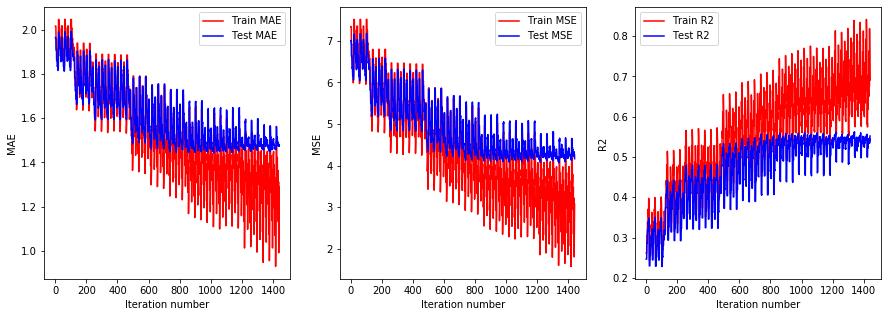

In [18]:
# Lets plot the three performance meterics for Train and test to select best model
plt.rcParams['figure.figsize'] = [15, 5]

# Plot MAE for train and test
plt.subplot(1,3,1)
plt.plot(Performance_GBM["Iteration_No"], Performance_GBM["Train_MAE"], 'r-', label= "Train MAE")
plt.plot(Performance_GBM["Iteration_No"], Performance_GBM["Test_MAE"], 'b-', label= "Test MAE")
plt.xlabel("Iteration number")
plt.ylabel("MAE")
plt.legend()

# Plot MSE for train and test
plt.subplot(1,3,2)
plt.plot(Performance_GBM["Iteration_No"], Performance_GBM["Train_MSE"], 'r-', label= "Train MSE")
plt.plot(Performance_GBM["Iteration_No"], Performance_GBM["Test_MSE"], 'b-', label= "Test MSE")
plt.xlabel("Iteration number")
plt.ylabel("MSE")
plt.legend()

# Plot r2 for train and test
plt.subplot(1,3,3)
plt.plot(Performance_GBM["Iteration_No"], Performance_GBM["Train_R2"], 'r-', label= "Train R2")
plt.plot(Performance_GBM["Iteration_No"], Performance_GBM["Test_R2"], 'b-', label= "Test R2")
plt.xlabel("Iteration number")
plt.ylabel("R2")
plt.legend()
plt.savefig("Manual_trainedGBM_Perf.png")
plt.show()


###### Comments:
Looking at the graph, we can see that the test R2 peaks at 0.54, MSE at 4.5 and MAE at 1.5. These results are very similar to a random grid search

In [19]:
best_random_gbm

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='huber',
                          max_depth=6, max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=25, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=183,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.6, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
clf = best_random_gbm

print("++++++++++++++++++++++++\n")
MAE1, MSE1, r21 = evaluate(clf, X_train, y_train,'Train Sample')
print("++++++++++++++++++++++++\n")
plt.rcParams['figure.figsize'] = [15, 5]
MAE2, MSE2, r22 = evaluate(clf, X_test, y_test, 'Test Sample')

++++++++++++++++++++++++

Model Performance:Train Sample
Mean Absolute Error: 1.2929.
Mean Square Error = 3.3847.
Rsquare = 0.6595
++++++++++++++++++++++++

Model Performance:Test Sample
Mean Absolute Error: 1.4295.
Mean Square Error = 4.1618.
Rsquare = 0.5524


In [21]:
def plot_ActvsPred(model, X, y, sample_name):
    plt.rcParams['figure.figsize'] = [10, 5]
    y_hat = model.predict(X)
    y_hat = pd.DataFrame(y_hat)
    y_hat.columns = ["Predicted"]
    y_hat["Actual"] = y
    obs_np = np.arange(0, len(y))
    y_hat = y_hat.sort_values("Actual", ascending=True)
    plt.plot(obs_np, y_hat["Actual"],'r-', label="Actual Age")
    plt.plot(obs_np, y_hat["Predicted"], 'b-', label="Predicted Age")
    plt.xlabel("observation")
    plt.ylabel("Age")
    plt.title("Actual Vs Predicted plot for {} sample".format(sample_name))
    plt.legend()
    plt.savefig(f'GBM_{sample_name}_actual_predicted.png')
    plt.plot()
    return

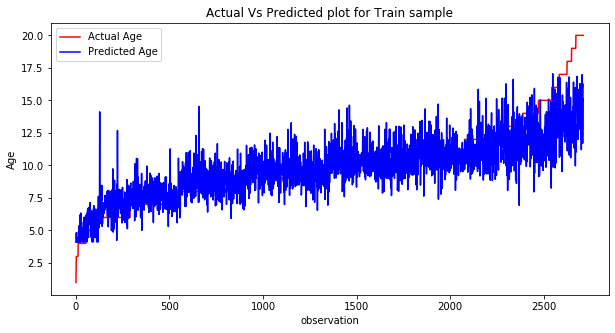

In [22]:
plot_ActvsPred(clf, X_train, y_train, "Train")

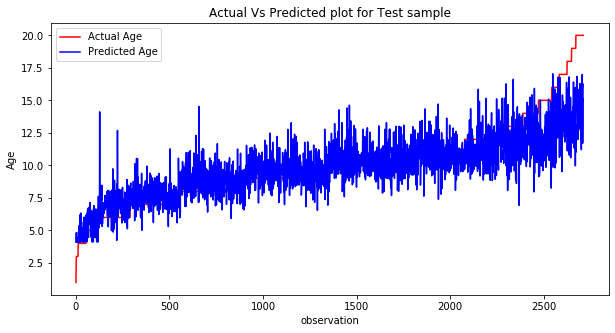

In [23]:
plot_ActvsPred(clf, X_train, y_train, "Test")

###### Comments:
The GBM model too does poorly on the extreme values. This could be because of data capturing error

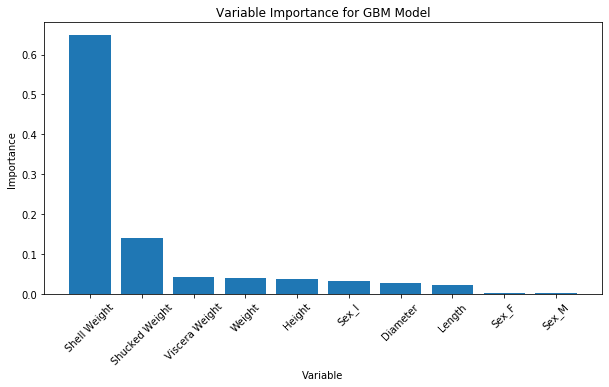

In [24]:
# Plot Variable Importance of the features in the final Model
variable_importance = clf.feature_importances_
variables = list(X_train.columns)
importance = pd.DataFrame(variables)
importance.columns = ["Variables"]
importance["Importance"] = variable_importance
importance = importance.sort_values("Importance", ascending = False)
plt.bar(importance["Variables"], importance["Importance"])
plt.xlabel("Variable")
plt.ylabel("Importance")
plt.title("Variable Importance for GBM Model") 
plt.xticks(rotation=45)
plt.savefig('VarImp_GBM.png')
plt.show()

###### Comments: Shell weight, is the primary variable which explains almost 60% of the output in a GBM model

#### Partial Dependence Plots:
###### Partial dependence plots (PDP) show the dependence between the target response 1 and a set of ‘target’ features, marginalizing over the values of all other features (the ‘complement’ features). Intuitively, we can interpret the partial dependence as the expected target response as a function of the ‘target’ features.

    > One-way PDPs tell us about the interaction between the target response and the target feature 
    > PDPs with two target features show the interactions among the two features
    > For more details, please refer the below link:
    https://scikit-learn.org/stable/modules/partial_dependence.html

In [25]:
# Import required librarier
from sklearn.inspection import plot_partial_dependence

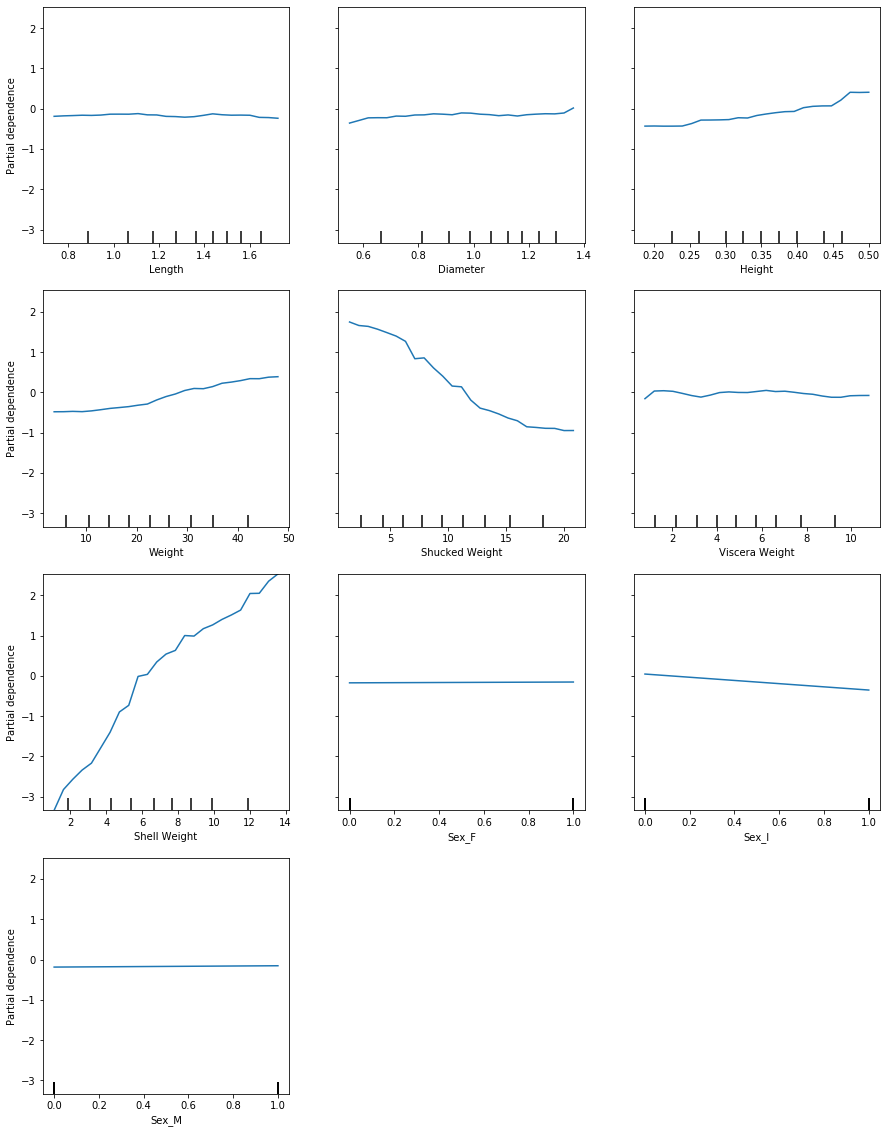

In [26]:
plt.rcParams['figure.figsize'] = [15, 20]
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plot_partial_dependence(clf, X_train, features, feature_names = list(X_train.columns), grid_resolution=25); 

###### Comments: PDP plots shows that 
    > "Shell Weight" has a positive linear relationship with age in the final selected GBM model. 

### Summary:

###### Comparison on Model Performance:

|             Model           | R2 (Train)  | MAE (Train) | MSE (Train) |R2 (Test)  | MAE (Test) | MSE (Test) |
|-----------------------------|:-----------:|:-----------:|:-----------:|:---------:|:----------:|:-----------|
|     Linear Regression       |   0.4180    |    1.7887   |   5.7849    |   0.3825  |   1.7622   |    5.7419  | 
|    Random Forest Regressor  |   0.8013    |    1.0054   |   1.9748    |   0.5535  |   1.4682   |    4.1519  |       
| Gradient Boosting Regressor |   0.6595    |    1.2929   |   3.3847    |   0.5524  |   1.4295   |    4.1618  |

###### Comments:
Based on perfromance metrics $ R^2 $, MAE and MSE for test, the models in order of performance are:

    Gradient Boosting Regressor <--- Random Forest Regressor <--- Linear Regression

In [27]:
# Save the GBM Model
import pickle

In [28]:
os.chdir('..\\Models\\')
filename = "GBM_Regressor.sav"
pickle.dump(best_random_gbm, open(filename, 'wb'))